# Import #

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pada analisa ini akan menggunakan `dataset_1` yang terlebih dahulu dilakukan data selection menggunakan SQL dengan menggabungkan beberapa dataset yang telah diberikan. <br>
pada dataset ini telah ditambahkan beberapa kolom baru yang memungkinkan memiliki pengaruh kepada target, yaitu:
- `count_feed_tray` = jumlah anco pada setiap siklus
- `total_feed` = jumlah total pakan selama siklus
- `avg_feed_per_day` = rata-rata jumlah pakan per hari setiap siklus
- `avg_growth_feed` = rata-rata pertambahan pakan setiap hari selama siklus
- `size_harvest` = jumlah(ukuran) udang per kg ketika panen
- `weight_harvest` = berat udang ketika panen
- `total_harvested` = jumlah(ekor) udang ketika panen
- `harvested_at` = tanggal panen
- `selling_price` = harga jual
- `survival_rate` = %udang dipanen per jumlah benih ditebar, didapatkan dari (total_harvested/total_seed*100)

In [2]:
df = pd.read_csv('dataset_1.csv')
df.head()

,cycle_id,pond_id,species_id,total_seed,started_at,finished_at,remark,area,initial_age,limit_weight_per_area,...,count_feed_tray,total_feed,avg_feed_per_day,avg_growth_feed,size_harvest,weight_harvest,total_harvested,harvested_at,selling_price,survival_rate
0,3458,12969,NaN,566669,2020-03-07,2020-06-27,NaN,4968.0,0.0,1.25,...,NaN,9987.0,89.97,0.38,255.0,7382.93,444548.0,2020-06-27,NaN,78.45
1,3459,12996,NaN,566669,2020-03-07,2020-07-06,NaN,4968.0,0.0,1.25,...,NaN,10913.0,90.19,0.03,256.0,7454.04,440388.0,2020-07-06,NaN,77.72
2,4036,12685,NaN,172250,2020-04-11,2020-05-20,NaN,800.0,0.0,1.25,...,NaN,480.1,12.63,0.30,700.0,441.00,154350.0,2020-05-20,NaN,89.61
3,4038,14334,NaN,350000,2020-04-12,2020-07-15,NaN,2700.0,0.0,1.25,...,NaN,7790.6,18.64,0.10,NaN,NaN,NaN,NaN,NaN,NaN
4,4039,14335,NaN,210000,2020-04-12,2020-07-15,NaN,1030.0,0.0,1.25,...,NaN,3770.5,9.02,0.05,NaN,NaN,NaN,NaN,NaN,NaN


# EDA #

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540 entries, 0 to 2539
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cycle_id                2540 non-null   int64  
 1   pond_id                 2540 non-null   int64  
 2   species_id              1727 non-null   float64
 3   total_seed              2540 non-null   int64  
 4   started_at              2540 non-null   object 
 5   finished_at             2539 non-null   object 
 6   remark                  1352 non-null   object 
 7   area                    2540 non-null   float64
 8   initial_age             2493 non-null   float64
 9   limit_weight_per_area   2533 non-null   float64
 10  target_cultivation_day  2537 non-null   float64
 11  target_size             2536 non-null   float64
 12  total_seed_type         2298 non-null   object 
 13  pond_name               2540 non-null   object 
 14  pond_size               2534 non-null   

## Define Target ##

In [4]:
# df['survival_rate'] = df['total_harvested']/df['total_seed']*100

In [5]:
df[['total_seed', 'total_harvested', 'survival_rate']].head()

,total_seed,total_harvested,survival_rate
0,566669,444548.0,78.45
1,566669,440388.0,77.72
2,172250,154350.0,89.61
3,350000,NaN,NaN
4,210000,NaN,NaN


## Statistical Descriptive ##

In [6]:
df.describe()

,cycle_id,pond_id,species_id,total_seed,area,initial_age,limit_weight_per_area,target_cultivation_day,target_size,pond_size,padat_tebar,count_feed_tray,total_feed,avg_feed_per_day,avg_growth_feed,size_harvest,weight_harvest,total_harvested,selling_price,survival_rate
count,2540.000000,2540.000000,1727.000000,2.540000e+03,2540.000000,2493.000000,2533.000000,2537.000000,2536.000000,2534.000000,2.534000e+03,722.000000,2540.000000,2540.000000,2539.000000,2341.000000,2341.000000,2.341000e+03,1.822000e+03,2341.000000
mean,19718.302756,32054.668504,1.077591,2.180202e+05,2226.784201,0.712796,1.616174,111.551833,52.789826,2038.910079,5.259223e+08,262.965374,4803.563134,22.776835,0.193734,346.448257,2626.300282,2.012343e+05,1.028887e+08,300.649855
std,6025.387273,10304.137971,0.267605,1.707156e+05,12275.405512,4.765797,7.173031,21.948512,23.176562,10563.559878,1.983993e+09,322.138141,17507.587763,47.720591,0.557429,498.468347,8323.130076,1.095885e+06,3.135855e+08,3946.774704
min,3458.000000,1.000000,1.000000,1.000000e+01,1.020000,0.000000,0.600000,0.000000,0.000000,7.000000,5.600000e+02,1.000000,0.000000,0.000000,-6.790000,10.700000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,16044.750000,24266.750000,1.000000,9.000000e+04,804.250000,0.000000,1.250000,100.000000,45.000000,850.170000,7.595519e+07,48.000000,559.000000,4.297500,0.010000,130.000000,380.000000,4.471700e+04,6.000000e+06,44.000000
50%,19778.000000,34491.500000,1.000000,1.849000e+05,1385.440000,0.000000,1.250000,120.000000,55.000000,1480.000000,2.449259e+08,172.000000,1891.375000,10.700000,0.040000,250.000000,1332.870000,1.071200e+05,3.372900e+07,70.880000
75%,24768.250000,39071.000000,1.000000,3.003938e+05,2238.682500,0.000000,1.250000,120.000000,55.000000,2305.000000,6.510551e+08,380.000000,5197.500000,21.375000,0.160000,415.100000,3407.000000,2.270000e+05,1.141209e+08,93.460000
max,29874.000000,47282.000000,2.000000,1.800000e+06,422500.000000,75.000000,270.000000,348.000000,1000.000000,422500.000000,7.393750e+10,2711.000000,219525.500000,532.300000,11.330000,10140.000000,250000.000000,4.000000e+07,1.125000e+10,115817.000000


## Univariate Analysis ##

**Numerical Columns**

In [7]:
nums = ['cycle_id', 'pond_id', 'species_id', 'total_seed',
        'area', 'initial_age', 'limit_weight_per_area',
       'target_cultivation_day', 'target_size',
       'pond_size', 'padat_tebar', 'count_feed_tray', 'total_feed',
       'avg_feed_per_day', 'avg_growth_feed', 'size_harvest', 'weight_harvest',
       'total_harvested', 'selling_price', 'survival_rate']

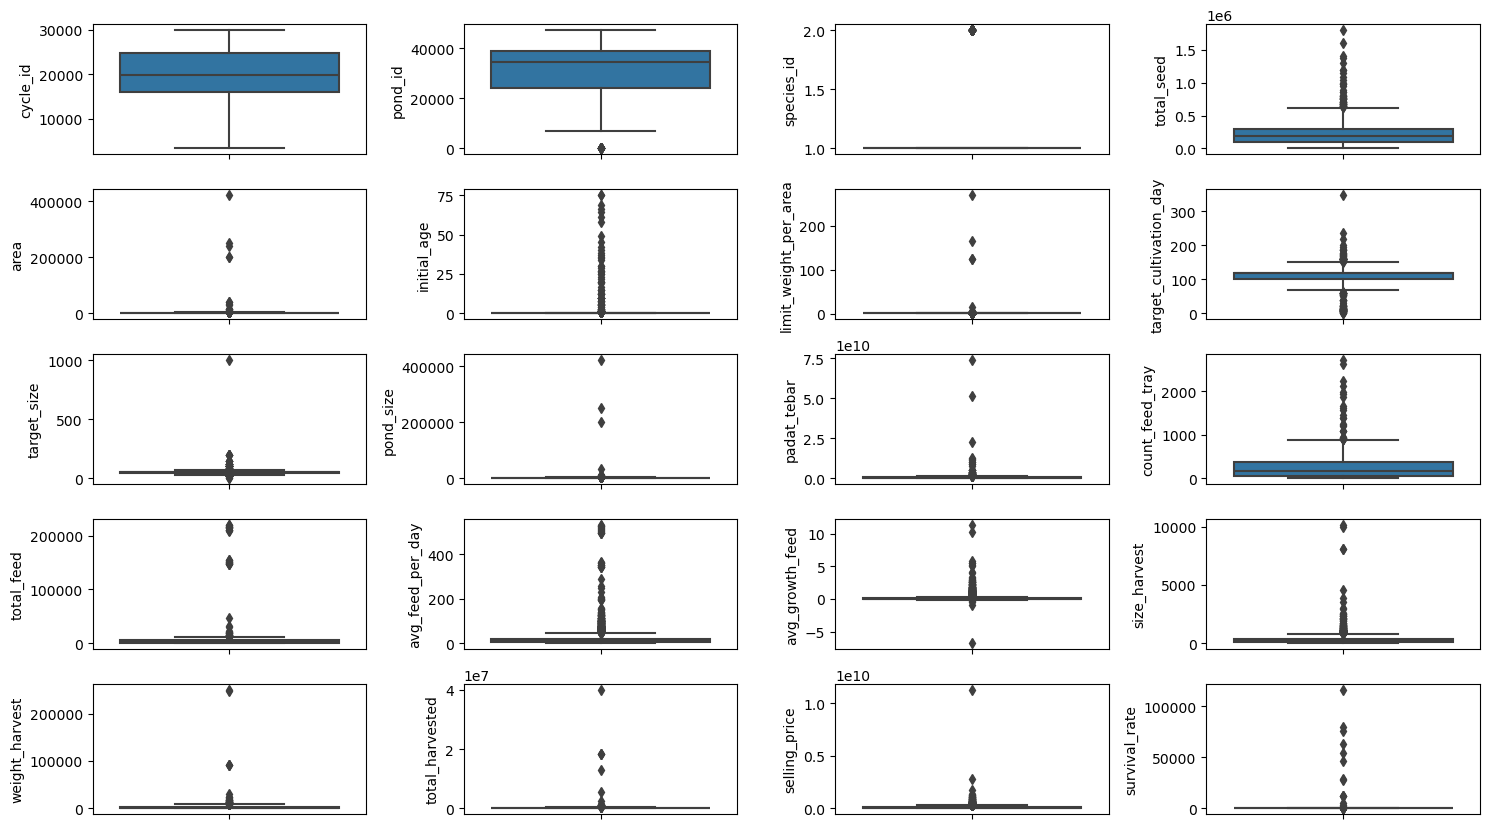

In [8]:
plt.figure(figsize=(15,10))
for i  in range(0, len(nums)):
    plt.subplot(6,4,i+1)
    sns.boxplot(y=df[nums[i]])
    plt.tight_layout()

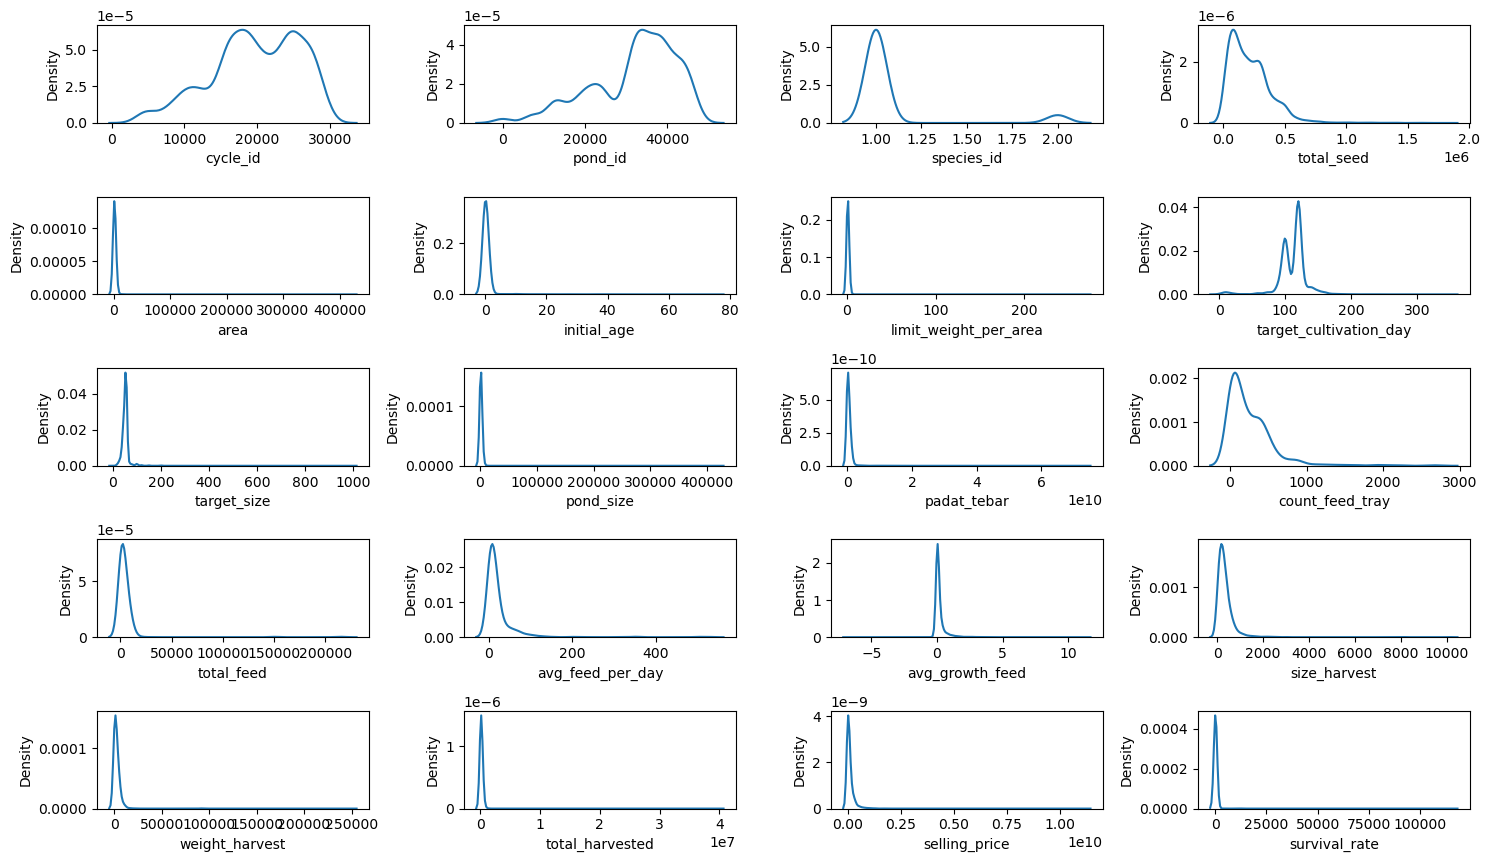

In [9]:
plt.figure(figsize=(15,10))
for i  in range(0, len(nums)):
    plt.subplot(6,4,i+1)
    sns.kdeplot(x=df[nums[i]])
    plt.tight_layout()

**Categorical Columns**

In [10]:
cats = ['remark', 'total_seed_type', 'pond_name', 'regency']

In [11]:
df[cats].describe()

,remark,total_seed_type,pond_name,regency
count,1352,2298,2540,21
unique,67,3,633,2
top,#SiklusFarm,net,A1,MAMUJU UTARA
freq,276,1022,313,13


In [12]:
df['pond_name'].value_counts()

pond_name
A1                 313
A2                 147
A                   91
A3                  67
A4                  44
                  ... 
Cahyo 1              1
Yudi 1               1
SUROTO SUKSES 1      1
SUKADI SUKSES1       1
Ponisan/Atang        1
Name: count, Length: 633, dtype: int64

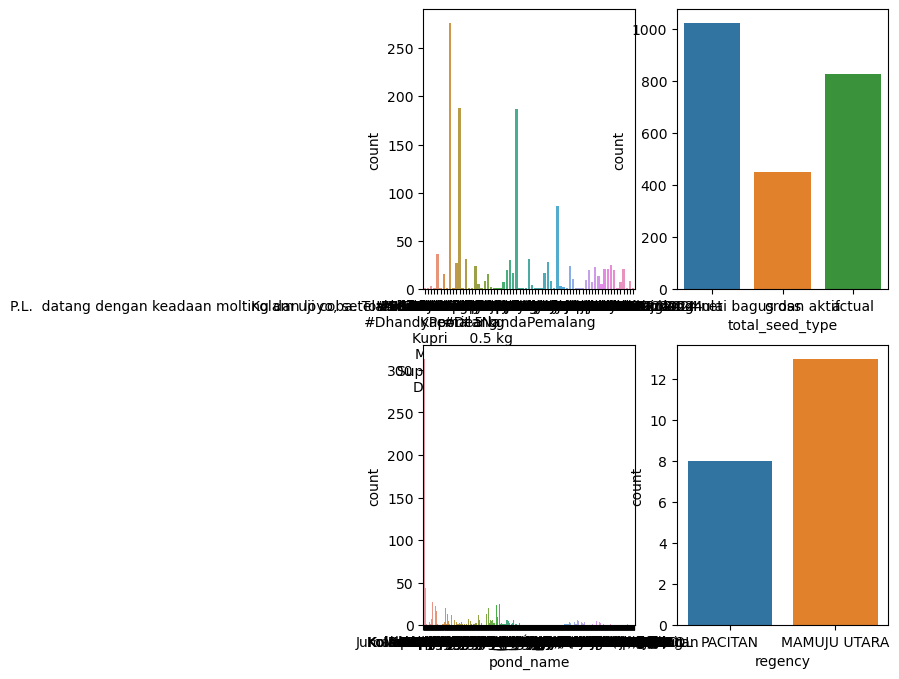

In [13]:
plt.figure(figsize=(6,8))
for i, col  in enumerate(cats):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[col])
    plt.tight_layout()

## Multivariate Analysis ##

<Axes: >

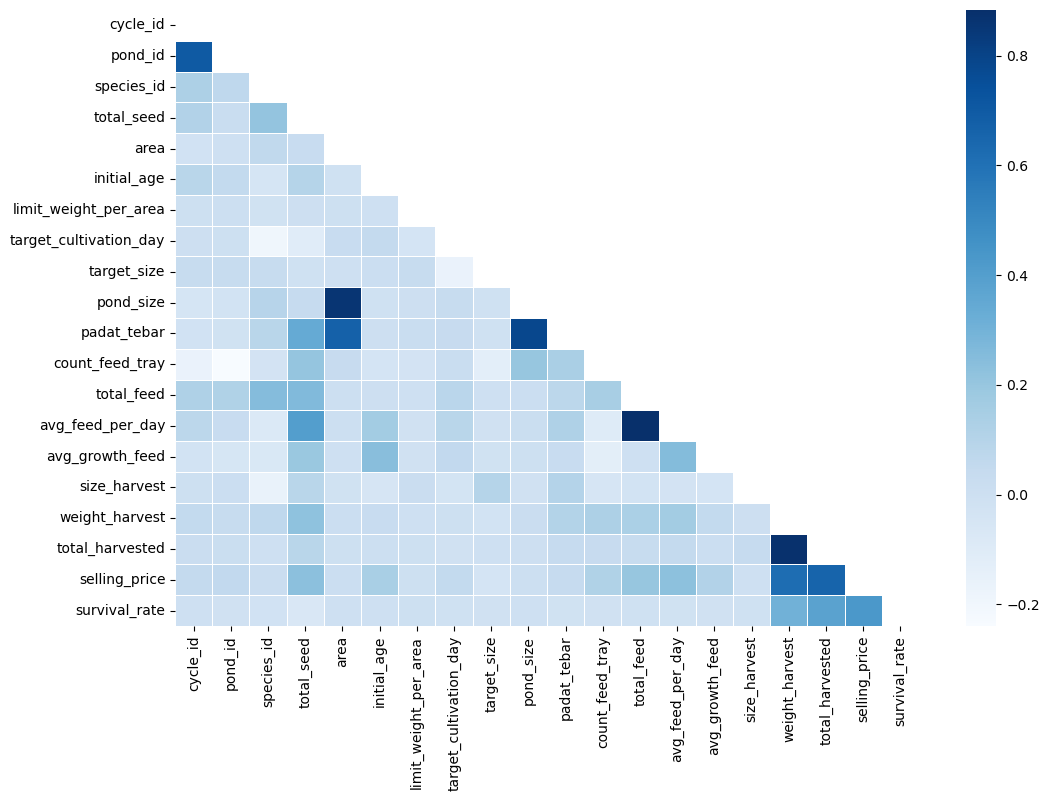

In [14]:
corr = df[nums].corr()
fig, axes = plt.subplots(figsize=(12, 8))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, linewidths=.5, cmap='Blues', annot=True, fmt='.2f')
# plt.show()

## Insights ##

pada kolom-kolom numerical hampir semua data terdistribusi dengan baik, tidak ada data yang persebarannya sangat random kecuali pada kolom id (cycle_id, pond_id, species_id)

# Data Preprocessing #

## Data Cleaning ##

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540 entries, 0 to 2539
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cycle_id                2540 non-null   int64  
 1   pond_id                 2540 non-null   int64  
 2   species_id              1727 non-null   float64
 3   total_seed              2540 non-null   int64  
 4   started_at              2540 non-null   object 
 5   finished_at             2539 non-null   object 
 6   remark                  1352 non-null   object 
 7   area                    2540 non-null   float64
 8   initial_age             2493 non-null   float64
 9   limit_weight_per_area   2533 non-null   float64
 10  target_cultivation_day  2537 non-null   float64
 11  target_size             2536 non-null   float64
 12  total_seed_type         2298 non-null   object 
 13  pond_name               2540 non-null   object 
 14  pond_size               2534 non-null   

### 1. Handle Missing Value ###

In [16]:
df.nunique()

cycle_id                  2500
pond_id                   1675
species_id                   2
total_seed                 868
started_at                 750
finished_at                857
remark                      67
area                       648
initial_age                 38
limit_weight_per_area       25
target_cultivation_day     121
target_size                 31
total_seed_type              3
pond_name                  633
pond_size                  610
padat_tebar               1572
regency                      2
count_feed_tray            360
total_feed                2375
avg_feed_per_day          1757
avg_growth_feed            202
size_harvest              1296
weight_harvest            1919
total_harvested           2158
harvested_at               820
selling_price             1645
survival_rate             2027
dtype: int64

In [17]:
df.isna().sum()

cycle_id                     0
pond_id                      0
species_id                 813
total_seed                   0
started_at                   0
finished_at                  1
remark                    1188
area                         0
initial_age                 47
limit_weight_per_area        7
target_cultivation_day       3
target_size                  4
total_seed_type            242
pond_name                    0
pond_size                    6
padat_tebar                  6
regency                   2519
count_feed_tray           1818
total_feed                   0
avg_feed_per_day             0
avg_growth_feed              1
size_harvest               199
weight_harvest             199
total_harvested            199
harvested_at               199
selling_price              718
survival_rate              199
dtype: int64

pada kolom-kolom yang memiliki nilai null <250(10%), imputasi akan menggunakan median karena data cenderung skewed. <br>
pada kolom `species_id` karena nilai unique hanya ada 2, maka imputasi akan menggunakan nilai yang lebih banyak. <br>
pada kolom `remark` karena nilai null cukup banyak (mendekati 50%), dan nilainya berupa notes atau keterangan, maka kolom tersebut akan dihapus. <br>
pada kolom `regency` karena hampir semua baris null, maka kolom tersebut akan dihapus. <br>
pada kolom `count_feed_tray` karena nilai null >50%, maka kolom tersebut akan dihapus. <br>
pada kolom `selling_price` memiliki nilai null yang cukup banyak, namun karena kolom ini akan cukup penting nantinya, maka imputasi akan menggunakan nilai median. <br>
karena kolom target yang akan digunakan adalah `survival_rate` maka untuk jumlah rows akan mengikuti jumlah rows pada kolom tersebut, sehingga pada kolom survival_rate nilai null akan di drop.

In [18]:
df.dropna(subset=['survival_rate'], inplace=True)

In [19]:
df.drop(['remark', 'regency', 'count_feed_tray'], axis=1, inplace=True)

In [20]:
df['initial_age'].fillna(df['initial_age'].median(), inplace=True)
df['limit_weight_per_area'].fillna(df['limit_weight_per_area'].median(), inplace=True)
df['target_cultivation_day'].fillna(df['target_cultivation_day'].median(), inplace=True)
df['target_size'].fillna(df['target_size'].median(), inplace=True)
df['pond_size'].fillna(df['pond_size'].median(), inplace=True)
df['padat_tebar'].fillna(df['padat_tebar'].median(), inplace=True)
df['avg_growth_feed'].fillna(df['avg_growth_feed'].median(), inplace=True)
df['selling_price'].fillna(df['selling_price'].median(), inplace=True)

In [21]:
df['species_id'].fillna(df['species_id'].mode()[0], inplace=True)
df['total_seed_type'].fillna(df['total_seed_type'].mode()[0], inplace=True)

In [22]:
df.isna().sum()

cycle_id                  0
pond_id                   0
species_id                0
total_seed                0
started_at                0
finished_at               0
area                      0
initial_age               0
limit_weight_per_area     0
target_cultivation_day    0
target_size               0
total_seed_type           0
pond_name                 0
pond_size                 0
padat_tebar               0
total_feed                0
avg_feed_per_day          0
avg_growth_feed           0
size_harvest              0
weight_harvest            0
total_harvested           0
harvested_at              0
selling_price             0
survival_rate             0
dtype: int64

### 2. Handle Duplicated Data ###

In [23]:
df.duplicated(subset=['cycle_id']).sum()

40

In [24]:
dup = df[df.duplicated(subset=['cycle_id'])]
df[df['cycle_id'].isin(dup['cycle_id'])]

,cycle_id,pond_id,species_id,total_seed,started_at,finished_at,area,initial_age,limit_weight_per_area,target_cultivation_day,...,padat_tebar,total_feed,avg_feed_per_day,avg_growth_feed,size_harvest,weight_harvest,total_harvested,harvested_at,selling_price,survival_rate
478,15006,31247,1.0,144900,2022-03-30,2022-06-18,1024.0,0.0,1.25,105.0,...,148377600.0,2036.00,5.52,0.06,116.0,1285.00,74530.0,2022-06-18,77614000.0,51.44
479,15006,31247,1.0,144900,2022-03-30,2022-06-18,1024.0,0.0,1.25,105.0,...,148377600.0,2036.00,5.52,0.06,116.0,1285.00,74530.0,2022-06-17,77614000.0,51.44
488,15015,31256,1.0,270900,2022-03-30,2022-06-10,1881.0,0.0,1.25,105.0,...,509562900.0,3100.00,9.39,0.08,427.0,2250.35,191974.0,2022-06-09,124991665.0,70.87
489,15015,31256,1.0,270900,2022-03-30,2022-06-10,1881.0,0.0,1.25,105.0,...,509562900.0,3100.00,9.39,0.08,427.0,2250.35,191974.0,2022-06-10,124991665.0,70.87
596,15803,32295,1.0,85000,2022-05-19,2022-07-16,2500.0,1.0,1.00,90.0,...,212500000.0,522.71,3.58,0.02,510.0,1140.00,181200.0,2022-05-16,56320000.0,213.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2357,27696,38250,1.0,325000,2023-11-29,2024-01-31,2500.0,0.0,1.25,100.0,...,812500000.0,3484.00,14.46,0.03,560.0,3252.40,427664.0,2024-01-31,80881900.0,131.59
2392,27882,37150,1.0,262140,2023-12-02,2024-03-16,1296.0,0.0,1.25,120.0,...,339733440.0,5350.00,50.95,0.21,622.0,5006.00,394135.0,2024-01-28,152303125.0,150.35
2393,27882,37150,1.0,262140,2023-12-02,2024-03-16,1296.0,0.0,1.25,120.0,...,339733440.0,5350.00,50.95,0.21,622.0,5006.00,394135.0,2024-03-16,152303125.0,150.35
2442,28305,38700,1.0,40000,2023-12-18,2024-02-14,360.0,0.0,1.25,120.0,...,14400000.0,189.80,0.88,0.00,400.0,285.00,57000.0,2024-02-12,4860000.0,142.50


In [25]:
df.drop_duplicates(subset=['cycle_id'], inplace=True)

### 3. Handle Outliers ###

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2301 entries, 0 to 2539
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cycle_id                2301 non-null   int64  
 1   pond_id                 2301 non-null   int64  
 2   species_id              2301 non-null   float64
 3   total_seed              2301 non-null   int64  
 4   started_at              2301 non-null   object 
 5   finished_at             2301 non-null   object 
 6   area                    2301 non-null   float64
 7   initial_age             2301 non-null   float64
 8   limit_weight_per_area   2301 non-null   float64
 9   target_cultivation_day  2301 non-null   float64
 10  target_size             2301 non-null   float64
 11  total_seed_type         2301 non-null   object 
 12  pond_name               2301 non-null   object 
 13  pond_size               2301 non-null   float64
 14  padat_tebar             2301 non-null   float

In [27]:
df[df['survival_rate'] > 100]

,cycle_id,pond_id,species_id,total_seed,started_at,finished_at,area,initial_age,limit_weight_per_area,target_cultivation_day,...,padat_tebar,total_feed,avg_feed_per_day,avg_growth_feed,size_harvest,weight_harvest,total_harvested,harvested_at,selling_price,survival_rate
16,4254,14706,1.0,300000,2020-05-02,2020-06-01,1000.0,0.0,1.25,120.0,...,241500000.0,597.00,31.42,1.67,500.0,603.0,301500.0,2020-06-01,33729000.0,100.50
19,4349,13222,1.0,80000,2020-05-10,2020-07-03,1000.0,0.0,1.25,120.0,...,32000000.0,816.50,16.33,0.49,200.0,560.0,112000.0,2020-07-03,33729000.0,140.00
28,4552,12945,1.0,12000,2020-05-29,2020-07-05,1000.0,0.0,1.20,120.0,...,288000.0,32.62,0.88,0.04,400.0,32.0,12800.0,2020-07-05,33729000.0,106.67
33,4750,15563,1.0,43200,2020-06-21,2020-09-20,400.0,0.0,1.25,91.0,...,17280000.0,908.00,2.55,0.00,143.0,660.2,45143.0,2020-09-20,33729000.0,104.50
34,4751,15564,1.0,43200,2020-06-21,2020-09-20,400.0,0.0,1.25,91.0,...,17280000.0,916.00,2.54,0.01,138.0,664.8,47743.0,2020-09-20,33729000.0,110.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2525,29393,37209,1.0,50000,2024-02-09,2024-03-30,650.0,0.0,1.25,100.0,...,32500000.0,578.90,10.92,0.22,300.0,604.0,56280.0,2024-03-30,33708000.0,112.56
2528,29451,45691,1.0,150000,2024-02-05,2024-03-29,400.0,0.0,1.25,100.0,...,60000000.0,1052.00,5.21,-0.01,595.0,800.0,156250.0,2024-03-29,213750.0,104.17
2531,29518,38473,1.0,40000,2024-02-11,2024-03-30,374.0,0.0,1.25,120.0,...,14960000.0,358.30,7.46,0.00,140.0,330.0,46200.0,2024-03-30,16500000.0,115.50
2535,29619,12688,1.0,70000,2024-02-12,2024-04-01,216.0,0.0,1.25,100.0,...,15120000.0,1043.40,4.88,0.02,365.0,850.0,137250.0,2024-04-01,38125000.0,196.07


Sebelum melakukan tindakan pada outliers, ditemukan nilai target `survival_rate` diatas 100%. Hal ini seharusnya tidak mungkin terjadi karena jumlah panen lebih banyak daripada jumlah bibit yang disebar. <br>
Untuk baris yang termasuk dalam kategori tersebut, akan **diasumsikan survival_rate >100% menjadi 100%**.

In [28]:
df.loc[df['survival_rate'] > 100, 'survival_rate'] = 100

In [29]:
cats = df.select_dtypes(include=['object', 'datetime64'])
nums = df.select_dtypes(exclude=['object', 'datetime64'])

In [30]:
cats = cats.columns
nums = nums.columns

In [31]:
from scipy import stats
dfz = df.copy()
print(f'Jumlah baris sebelum memfilter outlier: {len(dfz)}')

filtered_entries = np.array([True] * len(dfz))

for col in nums:
    zscore = abs(stats.zscore(dfz[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
dfz = dfz[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(dfz)}')

Jumlah baris sebelum memfilter outlier: 2301
Jumlah baris setelah memfilter outlier: 1948


## Feature Engineering ##

In [32]:
cats = dfz.select_dtypes(include='object')
cats

,started_at,finished_at,total_seed_type,pond_name,harvested_at
0,2020-03-07,2020-06-27,net,B1,2020-06-27
1,2020-03-07,2020-07-06,net,B2,2020-07-06
2,2020-04-11,2020-05-20,net,P1,2020-05-20
5,2020-04-15,2020-08-12,net,A2,2020-08-12
6,2020-04-15,2020-08-12,net,A3,2020-08-12
...,...,...,...,...,...
2534,2024-02-18,2024-03-29,net,Kolam C,2024-03-29
2535,2024-02-12,2024-04-01,net,Merdeka,2024-04-01
2536,2024-02-11,2024-03-14,net,A1,2024-03-14
2538,2024-01-09,2024-03-25,net,A1,2024-03-25


kolom `started_at`, `finished_at`, dan `harvested_at` merupakan kolom tanggal yang formatnya masih berupa object. <br>
agar bisa terbaca dengann baik oleh sistem maka akan kita buat kolom baru berdasarkan kolom-kolom tersebut: <br>
- `cycle_lead_time` = lama waktu siklus. didapatkan dari nilai pada kolom (finished_at - started_at)
- `harvest_time` = lama waktu dari dimulainya siklus hingga panen. didapatkan dari nilai pada kolom (harvested_at - started_at) <br>

pada kolom `total_seed_type` dan `pond_name` nilai akan diubah dengan menggunakan One Hot encoding karena data tidak memiliki urutan, untuk menghindari pembacaan yang salah oleh mesin. <br>
khusus pada kolom `pond_name` karena memiliki nunique yang cukup banyak, maka akan digunakan 5 angka terbanyak dan sisanya akan diasumsikan menadi satu angka.

In [33]:
dfz['started_at'] = pd.to_datetime(dfz['started_at'], format='%Y-%m-%d')
dfz['finished_at'] = pd.to_datetime(dfz['finished_at'], format='%Y-%m-%d')
dfz['harvested_at'] = pd.to_datetime(dfz['harvested_at'], format='%Y-%m-%d') 

In [34]:
dfz[['started_at','finished_at','harvested_at']].dtypes

started_at      datetime64[ns]
finished_at     datetime64[ns]
harvested_at    datetime64[ns]
dtype: object

In [35]:
dfz['cycle_lead_time'] = dfz['finished_at'] - dfz['started_at']
dfz['harvest_time'] = dfz['harvested_at'] - dfz['started_at']

In [36]:
dfz.sample(5)

,cycle_id,pond_id,species_id,total_seed,started_at,finished_at,area,initial_age,limit_weight_per_area,target_cultivation_day,...,avg_feed_per_day,avg_growth_feed,size_harvest,weight_harvest,total_harvested,harvested_at,selling_price,survival_rate,cycle_lead_time,harvest_time
2050,25441,43462,1.0,51000,2023-08-21,2023-10-21,2000.00,0.0,1.20,120.0,...,3.47,0.03,130.00,224.00,29120.0,2023-10-21,8.960000e+06,57.10,61 days,61 days
1132,18911,32629,1.0,540000,2022-08-31,2022-12-16,15000.00,1.0,1.25,120.0,...,21.16,0.12,32.00,5400.00,172800.0,2022-12-16,7.776000e+08,32.00,107 days,107 days
102,8006,18350,1.0,277500,2021-02-05,2021-04-26,1540.00,0.0,1.25,120.0,...,28.17,0.16,172.00,6690.91,327378.0,2021-04-26,4.076798e+08,100.00,80 days,80 days
2424,28066,46257,1.0,156086,2023-12-30,2024-03-27,803.84,0.0,1.25,120.0,...,7.40,0.02,287.59,1630.80,148081.0,2024-03-27,8.442721e+07,94.87,88 days,88 days
1062,18611,31450,1.0,230490,2022-10-17,2023-01-11,1947.69,0.0,1.25,100.0,...,11.12,0.01,729.56,2513.22,254818.0,2023-01-11,1.212834e+08,100.00,86 days,86 days


In [37]:
# dfa = df.copy()
dfz['cycle_lead_time'] = dfz['cycle_lead_time'].astype(str).str.replace(' days', '')
dfz['cycle_lead_time'] = dfz['cycle_lead_time'].astype(int)

dfz['harvest_time'] = dfz['harvest_time'].astype(str).str.replace(' days', '')
dfz['harvest_time'] = dfz['harvest_time'].astype(int)

In [38]:
dfz['pond_name'].value_counts()

pond_name
A1               230
A2               114
A                 82
A3                50
A4                37
                ... 
Saimin             1
B-16. SUGI         1
2 utara            1
1 selatan          1
Ponisan/Atang      1
Name: count, Length: 532, dtype: int64

In [39]:
def map_pond(pond):
    if pond == 'A1':
        return 'A1'
    elif pond == 'A2':
        return 'A2'
    elif pond == 'A':
        return 'A'
    elif pond == 'A3':
        return 'A3'
    elif pond == 'A4':
        return 'A4'
    else :
        return 'Other'

dfz['pond_name'] = dfz['pond_name'].apply(map_pond)

In [40]:
for cat in ['total_seed_type', 'pond_name']:
    onehots = pd.get_dummies(dfz[cat], prefix=cat)
    dfz = dfz.join(onehots)

In [41]:
for col in ['total_seed_type_actual', 'total_seed_type_gross',
       'total_seed_type_net', 'pond_name_A', 'pond_name_A1', 'pond_name_A2',
       'pond_name_A3', 'pond_name_A4', 'pond_name_Other']:
    dfz[col] = dfz[col].astype(int)

In [42]:
dfz.select_dtypes(include='float')

,species_id,area,initial_age,limit_weight_per_area,target_cultivation_day,target_size,pond_size,padat_tebar,total_feed,avg_feed_per_day,avg_growth_feed,size_harvest,weight_harvest,total_harvested,selling_price,survival_rate
0,1.0,4968.0,0.0,1.25,120.0,45.0,4811.01,2.726248e+09,9987.0,89.97,0.38,255.0,7382.93,444548.0,33729000.0,78.45
1,1.0,4968.0,0.0,1.25,121.0,45.0,4636.22,2.627203e+09,10913.0,90.19,0.03,256.0,7454.04,440388.0,33729000.0,77.72
2,1.0,800.0,0.0,1.25,120.0,45.0,726.80,1.251913e+08,480.1,12.63,0.30,700.0,441.00,154350.0,33729000.0,89.61
5,1.0,1250.0,0.0,1.25,120.0,45.0,1249.91,2.698027e+08,7182.5,60.36,0.14,496.0,3544.08,187493.0,33729000.0,86.86
6,1.0,1310.0,0.0,1.25,120.0,45.0,1309.70,2.979905e+08,7187.5,60.40,0.15,638.0,3781.38,200709.0,33729000.0,88.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2534,1.0,2800.0,0.0,1.25,100.0,25.0,2800.00,1.120000e+09,2412.0,12.56,0.07,150.0,1250.00,187500.0,56250000.0,46.88
2535,1.0,216.0,0.0,1.25,100.0,25.0,216.00,1.512000e+07,1043.4,4.88,0.02,365.0,850.00,137250.0,38125000.0,100.00
2536,1.0,2183.0,0.0,1.25,100.0,55.0,2183.00,1.637250e+08,15.0,0.39,0.04,200.0,60.00,12000.0,2100000.0,16.00
2538,1.0,900.0,0.0,1.25,100.0,55.0,900.00,1.125000e+08,1798.8,12.85,0.04,85.0,1038.00,88230.0,57401400.0,70.58


beberapa kolom numerical memiliki datatype float yang seharusnya integer. <br>
kolom-kolom tersebut adalah:
- `species_id`
- `initial_age`
- `target_cultivation_day`
- `total_harvested`
- `selling_price`

In [43]:
for col in ['species_id','initial_age','target_cultivation_day','total_harvested','selling_price']:
    dfz[col] = dfz[col].astype(int)

Drop Unused Column

In [44]:
# dfa = df.copy()
to_drop = ['started_at', 'finished_at', 'harvested_at', 'total_seed_type', 'pond_name']
dfz.drop(columns = to_drop, inplace=True)

In [45]:
dfz.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1948 entries, 0 to 2539
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cycle_id                1948 non-null   int64  
 1   pond_id                 1948 non-null   int64  
 2   species_id              1948 non-null   int32  
 3   total_seed              1948 non-null   int64  
 4   area                    1948 non-null   float64
 5   initial_age             1948 non-null   int32  
 6   limit_weight_per_area   1948 non-null   float64
 7   target_cultivation_day  1948 non-null   int32  
 8   target_size             1948 non-null   float64
 9   pond_size               1948 non-null   float64
 10  padat_tebar             1948 non-null   float64
 11  total_feed              1948 non-null   float64
 12  avg_feed_per_day        1948 non-null   float64
 13  avg_growth_feed         1948 non-null   float64
 14  size_harvest            1948 non-null   float

## Feature Transformation ##

Standardization

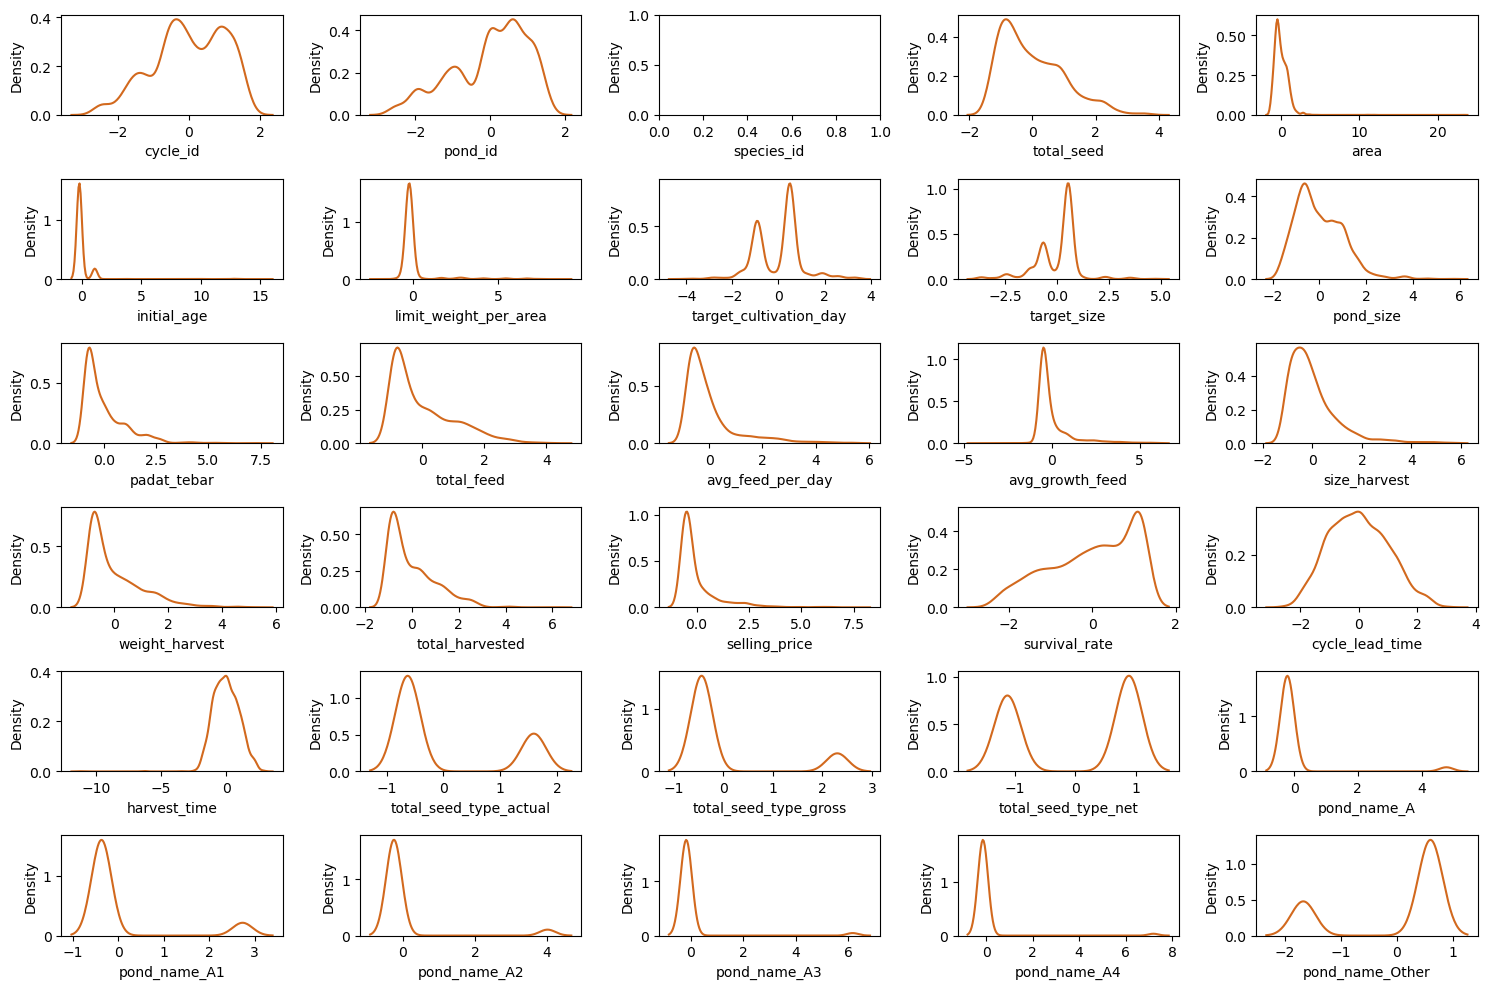

In [46]:
from sklearn.preprocessing import StandardScaler

df_std = dfz.copy()

col = df_std.columns
plt.figure(figsize=(15,10))
for i in range(0, len(col)):
    plt.subplot(6, 5, i+1)
    nama = col[i]
    df_std[nama] = StandardScaler().fit_transform(df_std[col[i]].values.reshape(len(df_std),1))
    sns.kdeplot(df_std[nama], color='chocolate')
    plt.tight_layout()

## Feature Selection ##

In [47]:
df_std.head()

,cycle_id,pond_id,species_id,total_seed,area,initial_age,limit_weight_per_area,target_cultivation_day,target_size,pond_size,...,harvest_time,total_seed_type_actual,total_seed_type_gross,total_seed_type_net,pond_name_A,pond_name_A1,pond_name_A2,pond_name_A3,pond_name_A4,pond_name_Other
0,-2.633372,-1.921311,0.0,2.679434,2.804673,-0.200973,-0.20559,0.490449,-0.676226,3.483019,...,1.287057,-0.628821,-0.435035,0.89092,-0.209629,-0.365892,-0.249317,-0.162307,-0.139146,0.597906
1,-2.633208,-1.918616,0.0,2.679434,2.804673,-0.200973,-0.20559,0.561073,-0.676226,3.297572,...,1.642479,-0.628821,-0.435035,0.89092,-0.209629,-0.365892,-0.249317,-0.162307,-0.139146,0.597906
2,-2.538829,-1.949656,0.0,-0.158127,-0.586109,-0.200973,-0.20559,0.490449,-0.676226,-0.850221,...,-1.595811,-0.628821,-0.435035,0.89092,-0.209629,-0.365892,-0.249317,-0.162307,-0.139146,0.597906
5,-2.537520,-1.783676,0.0,0.155601,-0.220022,-0.200973,-0.20559,0.490449,-0.676226,-0.295215,...,1.563497,-0.628821,-0.435035,0.89092,-0.209629,-0.365892,4.010950,-0.162307,-0.139146,-1.672504
6,-2.537357,-1.783576,0.0,0.239544,-0.171210,-0.200973,-0.20559,0.490449,-0.676226,-0.231779,...,1.563497,-0.628821,-0.435035,0.89092,-0.209629,-0.365892,-0.249317,6.161169,-0.139146,-1.672504


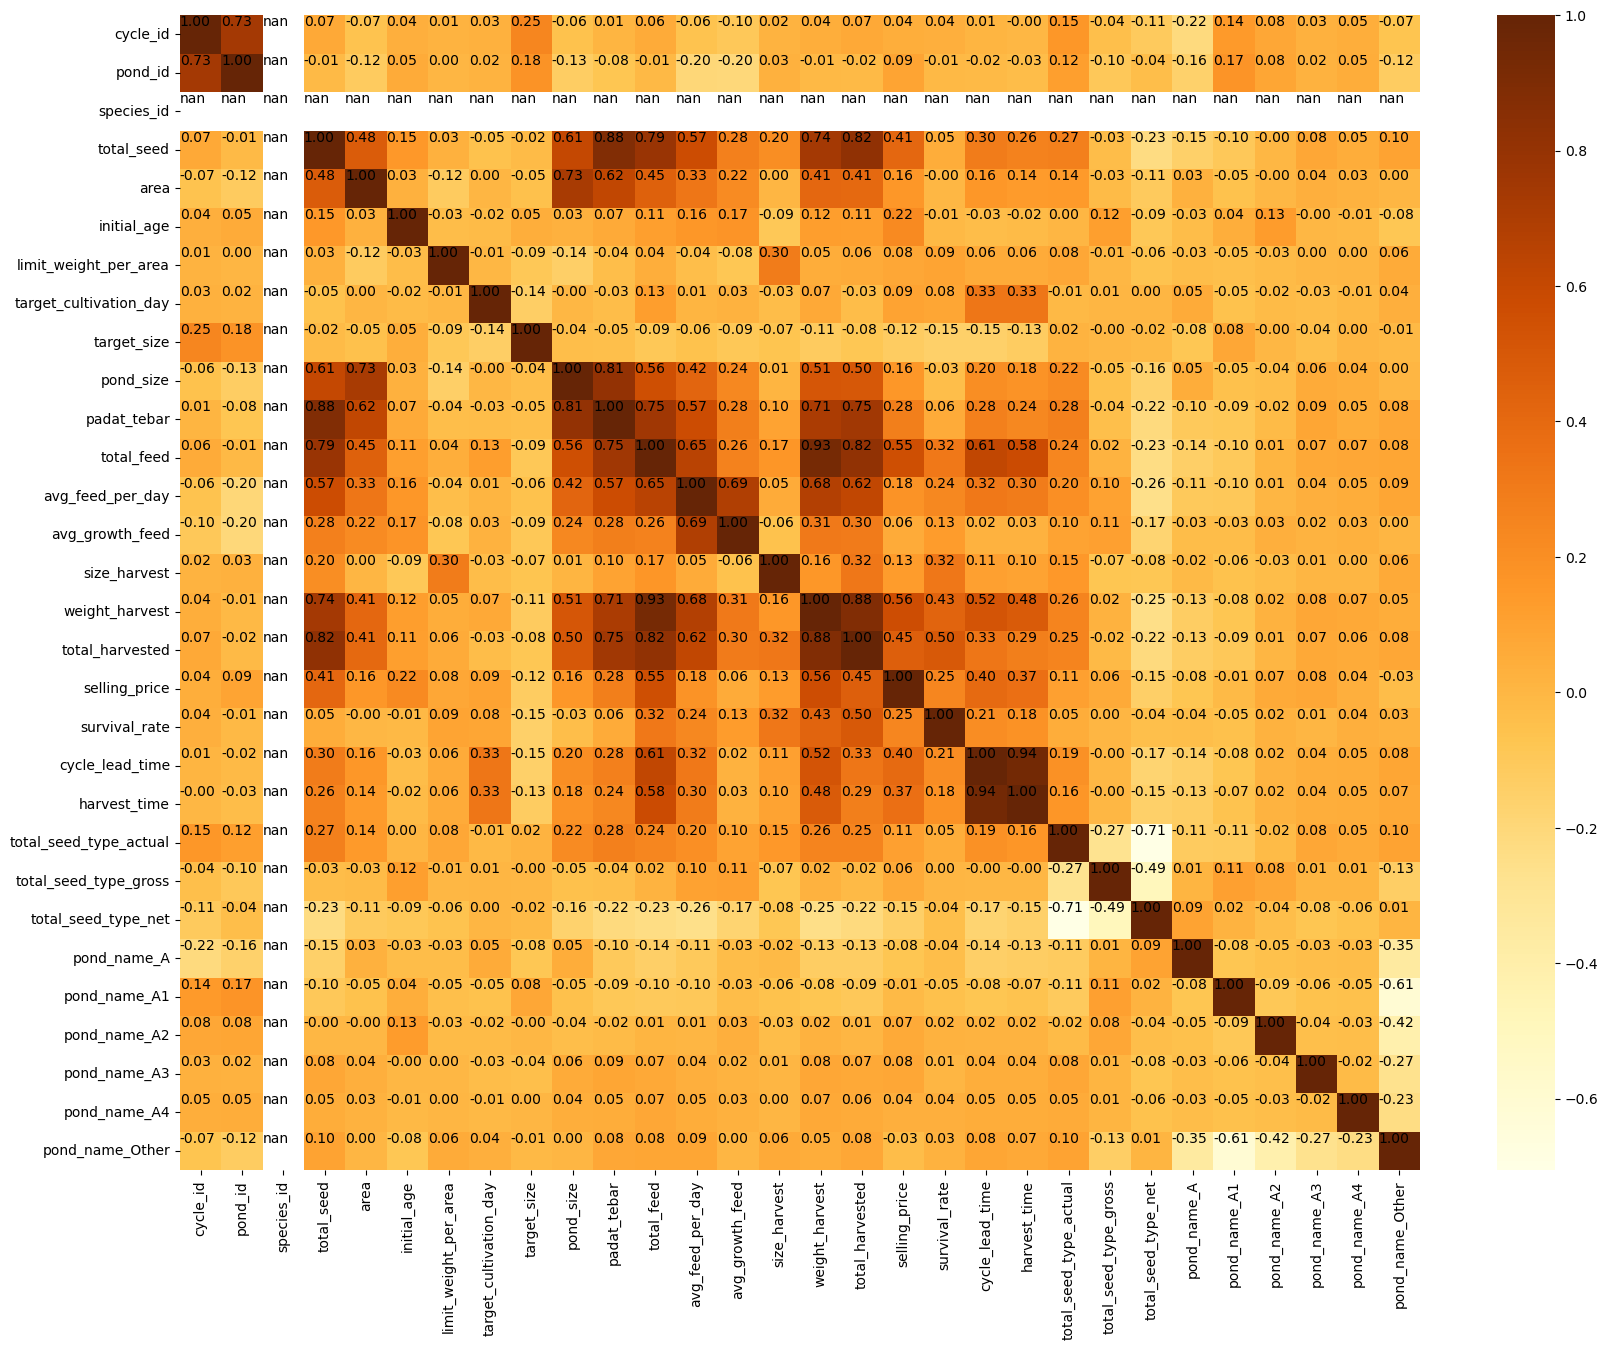

In [48]:
corr = df_std.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr, cmap='YlOrBr')
for i in range(len(corr.columns)):
  for j in range(len(corr.columns)):
    plt.text(i, j, f"{corr.iloc[i, j]:.2f}", ha='left', va='top')
# ax.xaxis.tick_top()
plt.xticks(rotation=90)
plt.show()

berdasarkan nilai korelasi pada heatmap, kami memutuskan untuk membuang kolom yang memiliki korelasi dibawah 0.1. sehingga terdapat 11 kolom yang akan kami gunakan pada tahap selanjutnya.

In [49]:
df_final = df_std[['cycle_id', 'target_size', 'total_feed', 'avg_feed_per_day', 'avg_growth_feed', 'size_harvest', 
                'weight_harvest', 'total_harvested', 'selling_price', 'cycle_lead_time', 'harvest_time', 'survival_rate']]
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1948 entries, 0 to 2539
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cycle_id          1948 non-null   float64
 1   target_size       1948 non-null   float64
 2   total_feed        1948 non-null   float64
 3   avg_feed_per_day  1948 non-null   float64
 4   avg_growth_feed   1948 non-null   float64
 5   size_harvest      1948 non-null   float64
 6   weight_harvest    1948 non-null   float64
 7   total_harvested   1948 non-null   float64
 8   selling_price     1948 non-null   float64
 9   cycle_lead_time   1948 non-null   float64
 10  harvest_time      1948 non-null   float64
 11  survival_rate     1948 non-null   float64
dtypes: float64(12)
memory usage: 262.4 KB


# Data Modeling #

### Split data Train - Test ###

In [50]:
X = df_final.drop('survival_rate',axis=1)
y = df_final['survival_rate'].values
print(X.shape)
print(y.shape)

(1948, 11)
(1948,)


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error, confusion_matrix, make_scorer

### Basic Modeling ###

In [53]:
lr_sm = LinearRegression()
dt_sm = DecisionTreeRegressor()
rf_sm = RandomForestRegressor()
gb_sm = GradientBoostingRegressor()

In [54]:
from sklearn.model_selection import cross_validate

def eval_classification(model):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    mae = mean_absolute_error(y_test, y_pred)
    mae1 = mean_absolute_error(y_train, y_pred_train)
    mse = mean_squared_error(y_test, y_pred)
    mse1 = mean_squared_error(y_train, y_pred_train)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    rmse1 = mean_squared_error(y_train, y_pred_train, squared=False)
    r2 = r2_score(y_test, y_pred)
    r21 = r2_score(y_train, y_pred_train)
    
    results = {'MAE (Test Set)': mae,
               'MAE (Train Set)': mae1,
               'MSE (Test Set)': mse,
               'MSE (Train Set)': mse1,
               'RMSE (Test Set)': rmse,
               'RMSE (Train Set)': rmse1,
               'R2-Score (Test Set)': r2,
               'R2-Score (Train Set)': r21
               }
    return results

In [55]:
model_list = [lr_sm, dt_sm, rf_sm, gb_sm]
results_list = []
for model in model_list:
    results = eval_classification(model)
    results_list.append(results)

In [56]:
df_results = pd.DataFrame(results_list, index=['Linear Regression',
                                               'Decision Tree',
                                               'Random Forest',
                                               'Gradient Boosting'])

df_results

,MAE (Test Set),MAE (Train Set),MSE (Test Set),MSE (Train Set),RMSE (Test Set),RMSE (Train Set),R2-Score (Test Set),R2-Score (Train Set)
Linear Regression,0.618636,6.622288e-01,0.587080,6.512605e-01,0.766211,8.070071e-01,0.352487,0.359667
Decision Tree,0.588264,4.560608e-18,0.742819,1.012658e-33,0.861870,3.182229e-17,0.180716,1.000000
Random Forest,0.436186,1.654990e-01,0.351226,4.847160e-02,0.592643,2.201627e-01,0.612620,0.952342
Gradient Boosting,0.485137,3.870329e-01,0.367008,2.338820e-01,0.605811,4.836134e-01,0.595213,0.770042


dari hasil modeling diatas, algoritma **Random Forest** menunjukkan nilai/scoring yang bagus pada masing-masing metrics, sehingga algoritma tersebut yang akan digunakan untuk melanjutkan proses forecasting.

### Hyperparameter Tuning ###

In [57]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(estimator=rf_sm, param_distributions=param_dist, cv=5, n_jobs=-1, verbose=2)
random_search.fit(X_train, y_train)

print(f"Best parameters: {random_search.best_params_}")

best_rf_sm = random_search.best_estimator_
y_pred_best_rf = best_rf_sm.predict(X_test)

mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Mean Squared Error (Best): {mse_best_rf}")
print(f"Mean Absolute Error (Best): {mae_best_rf}")
print(f"R-squared (Best): {r2_best_rf}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None}
Mean Squared Error (Best): 0.3584103869392375
Mean Absolute Error (Best): 0.4491513997172331
R-squared (Best): 0.6046953250208746


### Feature Importance ###

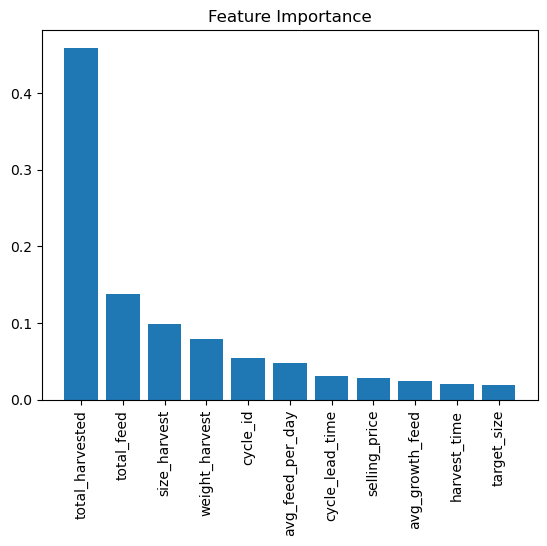

In [58]:
importances = best_rf_sm.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()

# Deployment #

In [77]:
import joblib

joblib.dump(best_rf_sm, 'best_rf_model.pkl')

['best_rf_model.pkl']

In [78]:
loaded_model = joblib.load('best_rf_model.pkl')

In [69]:
# df_new = dfz[['cycle_id', 'target_size', 'total_feed', 'avg_feed_per_day', 'avg_growth_feed', 'size_harvest', 
#                 'weight_harvest', 'total_harvested', 'selling_price', 'cycle_lead_time', 'harvest_time', 'survival_rate']]

df_new = dfz.copy()

In [70]:
X_new = df_new.drop('survival_rate',axis=1)
y_new = df_new['survival_rate'].values
# y_new = loaded_model.predict(X_new)

In [71]:
loaded_model.fit(X_new, y_new)
y_pred = loaded_model.predict(X_new)

In [72]:
# best_params = random_search.best_params_

# best_rf_model = RandomForestRegressor(
#     n_estimators=best_params['n_estimators'],
#     max_depth=best_params['max_depth'],
#     min_samples_split=best_params['min_samples_split'],
#     min_samples_leaf=best_params['min_samples_leaf'],
#     max_features=best_params['max_features'],
#     random_state=42
# )

# best_rf_model.fit(X_new, y_new)
# y_pred = best_rf_model.predict(X_new)

In [73]:
df_neww = X_new
df_neww['survival_rate'] = df_new['survival_rate']
df_neww['survival_rate_pred'] = y_pred

In [74]:
df_neww

,cycle_id,pond_id,species_id,total_seed,area,initial_age,limit_weight_per_area,target_cultivation_day,target_size,pond_size,...,total_seed_type_gross,total_seed_type_net,pond_name_A,pond_name_A1,pond_name_A2,pond_name_A3,pond_name_A4,pond_name_Other,survival_rate,survival_rate_pred
0,3458,12969,1,566669,4968.0,0,1.25,120,45.0,4811.01,...,0,1,0,0,0,0,0,1,78.45,77.673918
1,3459,12996,1,566669,4968.0,0,1.25,121,45.0,4636.22,...,0,1,0,0,0,0,0,1,77.72,77.548213
2,4036,12685,1,172250,800.0,0,1.25,120,45.0,726.80,...,0,1,0,0,0,0,0,1,89.61,88.905263
5,4044,14348,1,215858,1250.0,0,1.25,120,45.0,1249.91,...,0,1,0,0,1,0,0,0,86.86,88.467673
6,4045,14349,1,227526,1310.0,0,1.25,120,45.0,1309.70,...,0,1,0,0,0,1,0,0,88.21,88.639914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2534,29597,45690,1,400000,2800.0,0,1.25,100,25.0,2800.00,...,0,1,0,0,0,0,0,1,46.88,45.726489
2535,29619,12688,1,70000,216.0,0,1.25,100,25.0,216.00,...,0,1,0,0,0,0,0,1,100.00,99.532482
2536,29659,45493,1,75000,2183.0,0,1.25,100,55.0,2183.00,...,0,1,0,1,0,0,0,0,16.00,16.274745
2538,29873,43651,1,125000,900.0,0,1.25,100,55.0,900.00,...,0,1,0,1,0,0,0,0,70.58,71.539673


In [76]:
df_neww.to_csv('dataset_2.csv', index=False)